In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#let's import data

In [2]:
abd=pd.read_excel(r'C:\\Users\\LENOVO\\Desktop\\machine learning\\Datasets\\Indian Crime Analysis\\abduction.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
acc=pd.read_excel(r'C:\\Users\\LENOVO\\Desktop\\machine learning\\Datasets\\Indian Crime Analysis\\accidents.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
crimes=pd.read_csv(r'C:\\Users\\LENOVO\\Desktop\\machine learning\\Datasets\\Indian Crime Analysis\\crimes.csv')

In [5]:
murder=pd.read_csv(r'C:\\Users\\LENOVO\\Desktop\\machine learning\\Datasets\\Indian Crime Analysis\\murder.csv')

In [7]:
#Let's first deal with abduction cases

abd.head()

,STATE/UT,YEAR,No. Of Cases In Which Offenders Were Known To The Victims,No. Of Cases In Which Offenders Were Parents / Close Family Members,No. Of Cases In Which Offenders Were Relatives,No. Of Cases In Which Offenders Were Neighbours,No. Of Cases In Which Offenders Were Other Known Persons
0,Andhra Pradesh,2013,1635,5,156,626,848
1,Arunachal Pradesh,2013,75,0,6,14,55
2,Assam,2013,1937,8,99,990,840
3,Bihar,2013,1022,6,26,578,412
4,Chhattisgarh,2013,1380,15,70,323,972


In [22]:
abd.shape
#abductions dataset has 35 rows and 7 columns

(35, 7)

In [23]:
abd.columns

Index(['STATE/UT', 'YEAR',
       'No. Of Cases In Which Offenders Were Known To The Victims',
       'No. Of Cases In Which Offenders Were Parents / Close Family Members',
       'No. Of Cases In Which Offenders Were Relatives',
       'No. Of Cases In Which Offenders Were Neighbours',
       'No. Of Cases In Which Offenders Were Other Known Persons'],
      dtype='object')

In [8]:
list(abd['STATE/UT'].unique())

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'A&N Islands',
 'Chandigarh',
 'D&N Haveli',
 'Daman & Diu',
 'Delhi UT',
 'Lakshadweep',
 'Puducherry']

In [22]:
abd.YEAR.value_counts()

#all the cases are from 2013

2013    35
Name: YEAR, dtype: int64

In [40]:
#check the null values in the dataset
abd.isnull().sum()

STATE/UT                                                               0
YEAR                                                                   0
No. Of Cases In Which Offenders Were Known To The Victims              0
No. Of Cases In Which Offenders Were Parents / Close Family Members    0
No. Of Cases In Which Offenders Were Relatives                         0
No. Of Cases In Which Offenders Were Neighbours                        0
No. Of Cases In Which Offenders Were Other Known Persons               0
dtype: int64

In [12]:
#create a dataframe with all columns as index and there total values will be in column
Total_=pd.DataFrame({'total':[
                            abd['No. Of Cases In Which Offenders Were Known To The Victims'].sum(),
                            abd['No. Of Cases In Which Offenders Were Neighbours'].sum(),
                            abd['No. Of Cases In Which Offenders Were Other Known Persons'].sum(),
                            abd['No. Of Cases In Which Offenders Were Relatives'].sum(),
                            abd['No. Of Cases In Which Offenders Were Parents / Close Family Members'].sum()
]},index=['No. Of Cases In Which Offenders Were Known To The Victims',
         'No. Of Cases In Which Offenders Were Neighbours',
         'No. Of Cases In Which Offenders Were Other Known Persons',
         'No. Of Cases In Which Offenders Were Relatives',
         'No. Of Cases In Which Offenders Were Parents / Close Family Members'])

In [13]:
Total_

,total
No. Of Cases In Which Offenders Were Known To The Victims,31807
No. Of Cases In Which Offenders Were Neighbours,10782
No. Of Cases In Which Offenders Were Other Known Persons,18171
No. Of Cases In Which Offenders Were Relatives,2315
No. Of Cases In Which Offenders Were Parents / Close Family Members,539


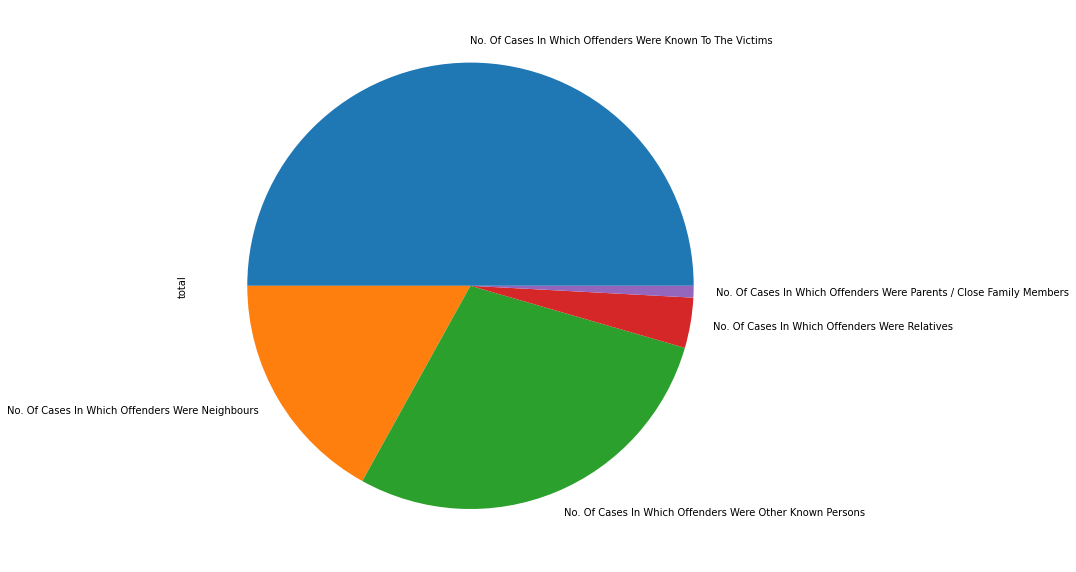

In [25]:
#lets plot a pie chart 
Total_.plot.pie(y='total', figsize=(10, 20),legend=False)

In [ ]:
# we can see that most of the offenders are other known people to victims

In [31]:
abd.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,35.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
No. Of Cases In Which Offenders Were Known To The Victims,35.0,908.771429,1094.576525,2.0,73.5,422.0,1286.5,4335.0
No. Of Cases In Which Offenders Were Parents / Close Family Members,35.0,15.400000,25.109408,0.0,0.0,6.0,16.0,108.0
No. Of Cases In Which Offenders Were Relatives,35.0,66.142857,79.460735,0.0,2.5,26.0,101.0,280.0
No. Of Cases In Which Offenders Were Neighbours,35.0,308.057143,470.152975,0.0,15.0,135.0,418.5,2423.0
No. Of Cases In Which Offenders Were Other Known Persons,35.0,519.171429,610.055084,2.0,45.5,248.0,827.0,2167.0


<img src='Screenshot (33).png'/>

This map shows No. of offenders thar were known to victims

This shows that Madhya Pradesh has the most Abduction cases.

Now some other visualiztions

<img src='Screenshot (34).png'/>

<img src='Screenshot (35).png'/>

<img src='Screenshot (36).png'/>

<img src='Screenshot (37).png'/>

<img src='Screenshot (38).png'/>

<img src='area1.png'/>

In [34]:
#let's lookup at accidents dataset
acc.head()

,Name of City,Total number of Fatal Accidents - 2011,All Accidents - 2011,Persons Killed - 2011,Persons Injured - 2011,Total number of Fatal Accidents - 2012,All Accidents - 2012,Persons Killed - 2012,Persons Injured - 2012,Fatal Accidents - 2013,...,Injured - 2014,Severity - 2014,Fatal Accidents - 2015,Greviously Injured Accidents - 2015,Minor Accidents - 2015,Non-Injurey Accidents - 2015,Total Accidents - 2015,Killed - 2015,Injured - 2015,Severity - 2015
0,Agra,336.0,1299.0,632.0,1046.0,381.0,922.0,427.0,675.0,436.0,...,747.0,50.6,498.0,369.0,260.0,16.0,1143.0,474.0,650.0,41.5
1,Ahmedabad,222.0,2020.0,227.0,2036.0,245.0,1850.0,251.0,1845.0,227.0,...,1597.0,16.0,318.0,351.0,1168.0,0.0,1837.0,328.0,1722.0,17.9
2,Asansol-Durgapur,229.0,368.0,230.0,185.0,199.0,380.0,224.0,315.0,200.0,...,284.0,47.4,210.0,160.0,60.0,16.0,446.0,210.0,220.0,47.1
3,Aurangabad,161.0,719.0,173.0,744.0,178.0,715.0,192.0,649.0,150.0,...,578.0,30.4,153.0,297.0,147.0,57.0,654.0,170.0,670.0,26.0
4,Bengaluru,689.0,6031.0,720.0,4952.0,707.0,5508.0,725.0,4527.0,733.0,...,4098.0,14.6,708.0,1331.0,1899.0,896.0,4834.0,713.0,4057.0,14.7


In [28]:
acc.shape

(52, 30)

In [70]:
list(acc.columns)

['Name of City',
 'Fatal Accidents-2011',
 'All Accidents - 2011',
 'Persons Killed - 2011',
 'Persons Injured - 2011',
 'Fatal Accidents-2012',
 'All Accidents - 2012',
 'Persons Killed - 2012',
 'Persons Injured - 2012',
 'Fatal Accidents - 2013',
 'Total Accidents - 2013',
 'Killed - 2013',
 'Injured - 2013',
 'Severity - 2013',
 'Fatal Accidents - 2014',
 'Greviously Injured Accidents - 2014',
 'Minor Accidents - 2014',
 'Non-Injurey Accidents - 2014',
 'Total Accidents - 2014',
 'Killed - 2014',
 'Injured - 2014',
 'Severity - 2014',
 'Fatal Accidents - 2015',
 'Greviously Injured Accidents - 2015',
 'Minor Accidents - 2015',
 'Non-Injurey Accidents - 2015',
 'Total Accidents - 2015',
 'Killed - 2015',
 'Injured - 2015',
 'Severity - 2015']

In [5]:
#renaming the columns
acc = acc.rename(columns={'Total number of Fatal Accidents - 2011': 'Fatal Accidents-2011',
                         'Total number of Fatal Accidents - 2012':'Fatal Accidents-2012'})#,inplace=True)

In [65]:
#checking for the null values
acc.isnull().sum()

Name of City                              0
Total number of Fatal Accidents - 2011    0
All Accidents - 2011                      0
Persons Killed - 2011                     0
Persons Injured - 2011                    0
Total number of Fatal Accidents - 2012    0
All Accidents - 2012                      0
Persons Killed - 2012                     0
Persons Injured - 2012                    0
Fatal Accidents - 2013                    0
Total Accidents - 2013                    0
Killed - 2013                             0
Injured - 2013                            0
Severity - 2013                           0
Fatal Accidents - 2014                    0
Greviously Injured Accidents - 2014       0
Minor Accidents - 2014                    0
Non-Injurey Accidents - 2014              0
Total Accidents - 2014                    0
Killed - 2014                             0
Injured - 2014                            0
Severity - 2014                           0
Fatal Accidents - 2015          

In [6]:
#replacing the null values with 0
acc.fillna(0,inplace=True)

In [7]:
#adding some new columns
acc['percent_killed-2011']=np.round((acc['Persons Killed - 2011']/acc['All Accidents - 2011'])*100,2)
acc['percent_killed-2012']=np.round((acc['Persons Killed - 2012']/acc['All Accidents - 2012'])*100,2)
acc['percent_killed-2013']=np.round((acc['Killed - 2013']/acc['Total Accidents - 2013'])*100,2)
acc['percent_killed-2014']=np.round((acc['Killed - 2014']/acc['Total Accidents - 2014'])*100,2)
acc['percent_killed-2015']=np.round((acc['Killed - 2015']/acc['Total Accidents - 2015'])*100,2)

In [8]:
acc['percent_injured-2011']=np.round((acc['Persons Injured - 2011']/acc['All Accidents - 2011'])*100,2)
acc['percent_injured-2012']=np.round((acc['Persons Injured - 2012']/acc['All Accidents - 2012'])*100,2)
acc['percent_injured-2013']=np.round((acc['Injured - 2013']/acc['Total Accidents - 2013'])*100,2)
acc['percent_injured-2014']=np.round(((acc['Injured - 2014']+acc['Greviously Injured Accidents - 2014'])/acc['Total Accidents - 2014'])*100,2)
acc['percent_injured-2015']=np.round(((acc['Injured - 2015']+acc['Greviously Injured Accidents - 2015'])/acc['Total Accidents - 2015'])*100,2)

In [9]:
#again replacing null values with 0
acc.fillna(0,inplace=True)

In [53]:
acc[acc['Name of City']=='Total'].T

,51
Name of City,Total
Fatal Accidents-2011,12025
All Accidents - 2011,89086
Persons Killed - 2011,13021
Persons Injured - 2011,62215
Fatal Accidents-2012,16190
All Accidents - 2012,110439
Persons Killed - 2012,16955
Persons Injured - 2012,80967
Fatal Accidents - 2013,16087


In [89]:
#percent increase in number of accidents in the span of 5 Years
inc_percent=np.round(((111024-89086)/531699)*100,2)
#percent increase in number of fatal accidents in 5 years 
percent_inc=np.round(((15799-12025)/75768)*100,2)
#percent increase of killed people in accidents from 2011-2015
per=np.round((14.87-14.62),2)
#percent increase of injured people in accidents from 2011-2015
p=np.round(98.33-69.84,2)

28.49

Observations:-

1.In 5 years , Total number of Accidents has increased by 4.13 %

2.Total Number of Fatal Accidents increased by 4.98%

3.Percentage of people killed in Fatal Accidents has increased by 0.25%

4.Percentage of people Injured in Accidents has increased by 28.49%

In [56]:
year=[2011,2012,2013,2014,2015]

In [57]:
#creating a new dataframe for total accidents , fatal accidenys, total killed, total injured throughout 5 years
ac=pd.DataFrame(year,columns=['Year'])

In [59]:
ac['Fatal Accidents']=[12025,16190,16087,15667,15799]

In [60]:
ac['Total Accidents']=[89086,110439,110192,110958,111024]

In [61]:
ac['Total killed']=[13021,16955,17007,16611,16513]

In [66]:
ac['Total Injured']=[62215,80967,80380,108681,109167]

In [ ]:
#Let's have a look at the dataframe 
ac.head()

In [98]:
#save to this csv file
ac.to_csv('ac_1.csv')

Again let's visualize

<img src='area plot.png'/>

Total killed didn't change over time.

Total injured and total number of accidents change drastically over time

In [55]:
acc.describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal Accidents-2011,52.0,462.500000,1662.893621,0.0,39.0000,215.500,324.7500,12025.00
All Accidents - 2011,52.0,3426.384615,12659.825121,0.0,141.0000,962.500,1990.0000,89086.00
Persons Killed - 2011,52.0,500.807692,1798.502962,0.0,61.7500,224.500,389.5000,13021.00
Persons Injured - 2011,52.0,2392.884615,8594.170155,0.0,96.7500,742.500,1837.0000,62215.00
Fatal Accidents-2012,52.0,622.692308,2221.374054,0.0,153.2500,250.500,390.0000,16190.00
All Accidents - 2012,52.0,4247.653846,15449.697356,0.0,714.0000,1190.500,2036.0000,110439.00
Persons Killed - 2012,52.0,652.115385,2325.392150,0.0,164.0000,266.000,412.7500,16955.00
Persons Injured - 2012,52.0,3114.115385,11134.968103,0.0,568.7500,977.500,1992.7500,80967.00
Fatal Accidents - 2013,52.0,618.730769,2205.493543,0.0,149.2500,246.000,388.0000,16087.00
Total Accidents - 2013,52.0,4238.153846,15390.861270,0.0,681.5000,1234.000,2060.5000,110192.00


In [82]:
acc[acc['All Accidents - 2012']>=2036.0][['Name of City','All Accidents - 2012']]

,Name of City,All Accidents - 2012
4,Bengaluru,5508.0
5,Bhopal,3623.0
7,Delhi,6937.0
12,Hyderabad,2577.0
13,Indore,5433.0
15,Jabalpur,2919.0
18,Kochi,2280.0
19,Kolkata,3937.0
26,Mallapuram,2711.0
27,Mumbai,24592.0


In [81]:
acc[acc['Total Accidents - 2014']>=2029.5][['Name of City','Total Accidents - 2014']]

,Name of City,Total Accidents - 2014
4,Bengaluru,5004.0
5,Bhopal,3459.0
7,Delhi,8623.0
12,Hyderabad,2908.0
13,Indore,5784.0
15,Jabalpur,3124.0
18,Kochi,2257.0
19,Kolkata,4561.0
26,Mallapuram,2719.0
27,Mumbai,22570.0


In [76]:
acc[acc['Name of City']=='Mumbai'][['All Accidents - 2011','All Accidents - 2012','Total Accidents - 2013','Total Accidents - 2014','Total Accidents - 2015']]

,All Accidents - 2011,All Accidents - 2012,Total Accidents - 2013,Total Accidents - 2014,Total Accidents - 2015
27,25471.0,24592.0,23512.0,22570.0,23468.0


In [ ]:
#Mumbai is the place where most accidents happen according to this dataset in the span of 5 years

In [ ]:
#Top 12 cities which have high numbers of accidents
#1.Bengaluru
#2.Bhopal
#3.Delhi
#4.Hyderabad
#5.Indore
#6.Jabalpur
#7.Kochi
#8.Kolkata
#9.Mallapuram
#10.Mumbai
#11.Chennai
#12.Raipur

In [4]:
#let's check the criminal data
crimes.head()

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339


In [5]:
crimes.shape

(5866, 19)

In [36]:
#renaming the columns
crimes.rename(columns={'Pupose':'Purpose'},inplace=True)

In [38]:
list(crimes.Purpose.unique())

['For Adoption',
 'For Begging',
 'For Camel racing',
 'For Illicit intercourse',
 'For marriage',
 'For Prostitution',
 'For Ransom',
 'For Revenge',
 'For Sale',
 'For Selling body parts',
 'For Slavery',
 'For unlawaful activity',
 'Others',
 'Total',
 'For unlawful activity']

In [39]:
crimes.YEAR.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [113]:
crimes.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5866.0,2006.513126,3.445978,2001.0,2004.0,2007.0,2010.0,2012.0
Total No. of cases reported,5866.0,121.667917,465.198526,0.0,0.0,0.0,21.0,8878.0
Male upto 10 years,5866.0,1.802932,16.321285,0.0,0.0,0.0,0.0,408.0
Female upto 10 years,5866.0,1.216161,9.121776,0.0,0.0,0.0,0.0,209.0
Male 10-15 years,5866.0,2.426526,30.860644,0.0,0.0,0.0,0.0,953.0
Female 10-15 years,5866.0,6.320491,36.194204,0.0,0.0,0.0,0.0,906.0
Male 15-18 years,5866.0,2.510740,17.738711,0.0,0.0,0.0,0.0,530.0
Female 15-18 years,5866.0,19.857143,117.901238,0.0,0.0,0.0,1.0,3081.0
Male 18-30 years,5866.0,16.400614,75.366121,0.0,0.0,0.0,1.0,1371.0
Female 18-30 years,5866.0,52.993863,218.121242,0.0,0.0,0.0,3.0,3682.0


In [209]:
crimes[crimes['Total No. of cases reported']>=6000][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
4325,Uttar Pradesh,2009,6083
4339,Uttar Pradesh,2010,6321
4353,Uttar Pradesh,2011,8500
4358,Uttar Pradesh,2012,6467
4367,Uttar Pradesh,2012,8878


<img src='map.png'/>

Uttar pradesh has the most number of criminal cases

In [ ]:
#Yearly analysis for females

<img src='line plot.png'/>

In [ ]:
#yearly analysis for males

<img src='line1.png'/>

In [ ]:
#comparison between total number of cases for males and females based on Purposes

<img src='compare.png'/>

In [52]:
crimes.groupby('Purpose')['Grand Total'].sum().sort_values(ascending=False)

Purpose
Total                      361459
For marriage               165838
Others                     131560
For Illicit intercourse     30083
For Ransom                  10681
For unlawaful activity       7912
For Revenge                  7162
For Prostitution             4491
For Adoption                 1297
For Slavery                  1005
For Sale                      964
For Begging                   355
For Camel racing               79
For Selling body parts         17
For unlawful activity          15
Name: Grand Total, dtype: int64

<img src='Screenshot (39).png'/>

The most common reason for crimes is usually marriages , other reasons and illicit intercourse.

In [ ]:
#reasons behind crimes against females

<img src='Screenshot (40).png'/>

In [ ]:
#Reasons behind crimes against males

<img src='Screenshot (41).png'/>

In [ ]:
#Females are more prone to crimes
#age group of 18-30 years is the most vulernable age group 
# Uttar Pradesh is the most unsafest place to live 

In [215]:
crimes[(crimes['Purpose']=='For Adoption') & (crimes['Total No. of cases reported']>=60)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
588,Bihar,2007,62
602,Bihar,2008,72
3346,Odisha,2012,104


In [220]:
crimes[(crimes['Purpose']=='For Begging') & (crimes['Total No. of cases reported']>=10)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
99,Andhra Pradesh,2008,18
3319,Odisha,2010,25
4649,West Bengal,2009,19
4663,West Bengal,2010,18
4677,West Bengal,2011,22


In [222]:
crimes[(crimes['Purpose']=='For Camel racing') & (crimes['Total No. of cases reported']>=40)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
1164,Gujarat,2012,70


In [228]:
crimes[(crimes['Purpose']=='For marriage') & (crimes['Total No. of cases reported']>=1000)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
382,Assam,2004,1181
396,Assam,2005,1228
410,Assam,2006,1255
424,Assam,2007,1249
438,Assam,2008,1369
452,Assam,2009,1595
466,Assam,2010,2114
480,Assam,2011,2715
494,Assam,2012,2963
592,Bihar,2007,1122


In [232]:
crimes[(crimes['Purpose']=='For Sale') & (crimes['Total No. of cases reported']>=50)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
4656,West Bengal,2009,163
4670,West Bengal,2010,175
4684,West Bengal,2011,136


In [233]:
crimes[(crimes['Purpose']=='For Slavery') & (crimes['Total No. of cases reported']>=60)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
38,Andhra Pradesh,2003,62
4294,Uttar Pradesh,2007,147
4308,Uttar Pradesh,2008,94
5372,Delhi UT,2001,62


In [238]:
crimes[(crimes['Purpose']=='For Illicit intercourse') & (crimes['Total No. of cases reported']>=300)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
1585,Jammu & Kashmir,2006,405
1613,Jammu & Kashmir,2008,341
1669,Jammu & Kashmir,2012,316
3349,Odisha,2012,307
4203,Uttar Pradesh,2001,931
4217,Uttar Pradesh,2002,685
4231,Uttar Pradesh,2003,498
4245,Uttar Pradesh,2004,892
4259,Uttar Pradesh,2005,991
4273,Uttar Pradesh,2006,1161


In [246]:
crimes[(crimes['Purpose']=='For Prostitution') & (crimes['Total No. of cases reported']>=70)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
117,Andhra Pradesh,2009,75
439,Assam,2008,84
453,Assam,2009,95
467,Assam,2010,126
481,Assam,2011,211
649,Bihar,2011,73
2455,Maharashtra,2008,74
4611,West Bengal,2006,206
4625,West Bengal,2007,164
4653,West Bengal,2009,200


In [248]:
crimes[(crimes['Purpose']=='For Revenge') & (crimes['Total No. of cases reported']>=90)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
343,Assam,2001,95
357,Assam,2002,106
371,Assam,2003,95
511,Bihar,2001,182
525,Bihar,2002,155
539,Bihar,2003,136
553,Bihar,2004,152
567,Bihar,2005,90
651,Bihar,2011,304
665,Bihar,2012,311


In [252]:
crimes[(crimes['Purpose']=='For Selling body parts') & (crimes['Total No. of cases reported']>=1)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
345,Assam,2001,1
387,Assam,2004,1
569,Bihar,2005,3
751,Chhattisgarh,2006,1
1311,Haryana,2010,10
4699,West Bengal,2012,1


In [257]:
crimes[(crimes['Purpose']=='For Ransom') & (crimes['Total No. of cases reported']>=90)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
510,Bihar,2001,492
524,Bihar,2002,397
538,Bihar,2003,374
552,Bihar,2004,405
566,Bihar,2005,287
580,Bihar,2006,156
1812,Jharkhand,2010,147
2190,Madhya Pradesh,2001,132
2204,Madhya Pradesh,2002,126
2218,Madhya Pradesh,2003,136


In [262]:
crimes[(crimes['Purpose']=='Others') & (crimes['Total No. of cases reported']>=1500)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
558,Bihar,2004,1784
3694,Rajasthan,2012,1500
4674,West Bengal,2010,2271
4688,West Bengal,2011,3182
4702,West Bengal,2012,3441
5486,Delhi UT,2009,2245
5500,Delhi UT,2010,2977
5514,Delhi UT,2011,3492
5528,Delhi UT,2012,3708


In [264]:
crimes[(crimes['Purpose']=='For unlawaful activity') & (crimes['Total No. of cases reported']>=100)][['STATE/UT','YEAR','Total No. of cases reported']]

,STATE/UT,YEAR,Total No. of cases reported
11,Andhra Pradesh,2001,164
25,Andhra Pradesh,2002,108
39,Andhra Pradesh,2003,319
53,Andhra Pradesh,2004,174
67,Andhra Pradesh,2005,168
137,Andhra Pradesh,2010,104
151,Andhra Pradesh,2011,131
389,Assam,2004,103
417,Assam,2006,126
557,Bihar,2004,158


<img src='Screenshot (42).png'/>

In [ ]:
#for unlawful activity, west bengal, bihar, assam,andhra pradesh are the rank holders

In [ ]:
# for others , west bengal, delhi, rajasthan, bihar are rank holders

In [ ]:
#for ransom, West bengal, MP,jharkhand,bihar are the rank holders

In [ ]:
#for selling body parts , haryana is no. 1

In [ ]:
#for revenge , UP,Bihar,assam are the rank holders

In [ ]:
#for Prostitution , West Bengal , Bihar, Assam and Andhra Pradesh

In [ ]:
#for Illicit intercourse, UP , Odisha and J&K are the rank holders

In [ ]:
#for the slavery ---> andhra pradesh ,UP, Delhi UT

In [ ]:
#for sale , west bengal has the most reported cases

In [ ]:
#For begging , west bengal , odisha, andhra pradesh has the highest number of cases

In [ ]:
#for Camel racing , gujarat has the most number of cases reported

In [ ]:
#For adoption , odisha and bihar have high numbers of cases reported

In [ ]:
#for marriage , assam,bihar,UP,West Bengal,Gujarat,Rajasthan,Tamil Nadu

In [87]:
year=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]
yearly_crimes=pd.DataFrame(year,columns=['Year'])

In [88]:
purp=list(crimes.Purpose.unique())

In [89]:
for j in range(len(purp)):
    print(f'{purp[j]}')
    for i in range(len(year)):
        print(crimes[(crimes['Purpose']==purp[j]) & (crimes['YEAR']==year[i])]['Total No. of cases reported'].sum() ,',')

For Adoption
89 ,
86 ,
60 ,
55 ,
110 ,
107 ,
131 ,
144 ,
50 ,
127 ,
105 ,
227 ,
For Begging
28 ,
23 ,
7 ,
18 ,
18 ,
23 ,
15 ,
34 ,
30 ,
59 ,
45 ,
31 ,
For Camel racing
0 ,
0 ,
0 ,
0 ,
0 ,
0 ,
3 ,
0 ,
0 ,
2 ,
4 ,
70 ,
For Illicit intercourse
2038 ,
1808 ,
1618 ,
2067 ,
2114 ,
2625 ,
2651 ,
2677 ,
2804 ,
3139 ,
3523 ,
2989 ,
For marriage
9199 ,
9113 ,
8448 ,
9794 ,
9825 ,
10674 ,
12856 ,
14539 ,
16225 ,
18322 ,
22016 ,
24644 ,
For Prostitution
122 ,
187 ,
172 ,
222 ,
136 ,
340 ,
313 ,
259 ,
518 ,
464 ,
637 ,
311 ,
For Ransom
1366 ,
1060 ,
1129 ,
1140 ,
813 ,
630 ,
584 ,
746 ,
611 ,
738 ,
664 ,
607 ,
For Revenge
941 ,
983 ,
740 ,
713 ,
490 ,
471 ,
411 ,
444 ,
342 ,
268 ,
565 ,
717 ,
For Sale
34 ,
10 ,
18 ,
20 ,
55 ,
12 ,
30 ,
26 ,
223 ,
198 ,
203 ,
73 ,
For Selling body parts
1 ,
0 ,
0 ,
1 ,
3 ,
1 ,
0 ,
0 ,
0 ,
10 ,
0 ,
1 ,
For Slavery
130 ,
36 ,
65 ,
78 ,
26 ,
113 ,
159 ,
120 ,
99 ,
48 ,
67 ,
34 ,
For unlawaful activity
526 ,
444 ,
707 ,
649 ,
609 ,
533 ,
408 ,
573 ,
817 ,
844 ,
876 ,
68

In [90]:
yearly_crimes['For Adoption']=[89,86,60,55,110,107,131,144,50,127,105,227]

In [111]:
yearly_crimes['For Selling body parts']=[1,0,0,1,3,1,0,0,0,10,0,1]

In [91]:
yearly_crimes['For Begging']=[28,23,7,18,18,23,15,34,30,59,45,31]

In [92]:
yearly_crimes['For Camel racing']=[0,0,0,0,0,0,3,0,0,2,4,70]

In [106]:
yearly_crimes['For Illicit intercourse']=[2038,1808,1618,2067,2114,2625,2651,2677,2804,3139,3523,2989]

In [93]:
yearly_crimes['For marriage']=[9199,9113,8448,9794,9825,10674,12856,14539,16225,18322,22016,24644]

In [94]:
yearly_crimes['For Prostitution']=[122,187,172,222,136,340,313,259,518,464,637,311]

In [95]:
yearly_crimes['For Ransom']=[1366,1060 ,1129 ,1140 ,813 ,630 ,584 ,746 ,611 ,738 ,664,607 ]

In [105]:
yearly_crimes['For Revenge']=[941,983 ,740 ,713 ,490 ,471 ,411 ,444 ,342 ,268,565,717]

In [96]:
yearly_crimes['For Sale']=[34 ,
10 ,
18 ,
20 ,
55 ,
12 ,
30 ,
26 ,
223 ,
198 ,
203,73]

In [104]:
yearly_crimes['For Slavery']=[130 ,
36 ,
65 ,
78 ,
26 ,
113 ,
159 ,
120 ,
99 ,
48 ,
67,34]

In [112]:
yearly_crimes['For unlawful activity']=[526 ,
444 ,
707 ,
649 ,
609 ,
15  ,                                    
533 ,
408 ,
573 ,
817 ,
844,685]

In [101]:
yearly_crimes['Others']=[8008 ,8100 ,7028 ,8570 ,8633 ,8447 ,10000 ,10699 ,12141 ,14221 ,15959,17203]

In [99]:
yearly_crimes['Total']=[22482 ,21850 ,19992 ,23327 ,22832 ,23991 ,27561 ,30261 ,33860 ,38440 ,44664,47592 ]

In [ ]:
yearly_crimes.head()

In [188]:
yearly_crimes.to_csv('yearly crimes.csv')

In [ ]:
#visualiztions

<img src='Screenshot (45).png'/>

<img src='Screenshot (46).png'/>

In [53]:
#lets analyze murders dataset
murder.head()

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
0,Andhra Pradesh,2013,Male,26,9,19,445,1036,199,1734
1,Andhra Pradesh,2013,Female,20,9,11,287,300,123,750
2,Andhra Pradesh,2013,Total,46,18,30,732,1336,322,2484
3,Arunachal Pradesh,2013,Male,0,0,1,32,31,1,65
4,Arunachal Pradesh,2013,Female,0,1,1,2,0,0,4


In [114]:
murder.shape

(105, 10)

In [53]:
murder['YEAR'].unique()
#it means we have only one year to analyze

array([2013], dtype=int64)

In [267]:
#droped the year column
murders=murder.drop(['YEAR'],axis=1)
#check the head of the dataset
murders.head()

,STATE/UT,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
0,Andhra Pradesh,Male,26,9,19,445,1036,199,1734
1,Andhra Pradesh,Female,20,9,11,287,300,123,750
2,Andhra Pradesh,Total,46,18,30,732,1336,322,2484
3,Arunachal Pradesh,Male,0,0,1,32,31,1,65
4,Arunachal Pradesh,Female,0,1,1,2,0,0,4


In [268]:
murders.describe().T

,count,mean,std,min,25%,50%,75%,max
Upto 10 years,105.0,16.342857,25.909171,0.0,0.0,3.0,25.0,143.0
10-15 years,105.0,7.638095,15.534158,0.0,0.0,2.0,9.0,119.0
15-18 years,105.0,16.914286,35.468327,0.0,0.0,4.0,20.0,273.0
18-30 years,105.0,284.000000,428.106542,0.0,10.0,64.0,402.0,2243.0
30-50 years,105.0,254.400000,362.331436,0.0,8.0,82.0,370.0,1826.0
Above 50 years,105.0,66.438095,109.170379,0.0,2.0,16.0,87.0,598.0
Total,105.0,645.733333,925.225204,0.0,24.0,184.0,968.0,5173.0


<img src='Screenshot (32).png'/>

In [ ]:
#males have been murdered more than females in this dataset
#Uttar pradesh has the most reported murder cases

<img src='Screenshot (47).png'/>

In [ ]:
#18-30 years again the most vulernable group according to this dataset